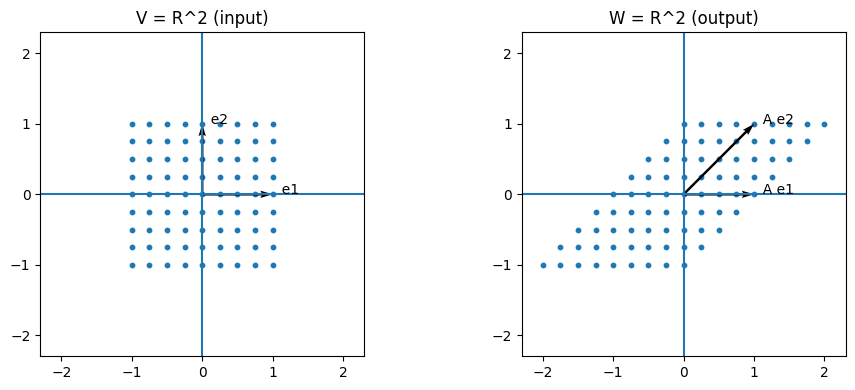

A =
[[1. 1.]
 [0. 1.]]

Opbouw uit basis-eenheden:
A = a11*E11 + a12*E12 + a21*E21 + a22*E22
met (a11,a12,a21,a22) = (1, 1, 0, 1)

Check (A - som a_ij E_ij) =
[[0. 0.]
 [0. 0.]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- basis "eenheidsmaps" E_ij (matrix met 1 op (i,j), elders 0) ---
E11 = np.array([[1, 0],
                [0, 0]], dtype=float)
E12 = np.array([[0, 1],
                [0, 0]], dtype=float)
E21 = np.array([[0, 0],
                [1, 0]], dtype=float)
E22 = np.array([[0, 0],
                [0, 1]], dtype=float)

basis = {"E11": E11, "E12": E12, "E21": E21, "E22": E22}

def plot_linear_map(a11=1.0, a12=0.0, a21=0.0, a22=1.0, grid_n=9):
    """
    Visualiseer f: R^2 -> R^2 gegeven door matrix A.
    - Links: punten (x,y) in V=R^2 (een grid + basisvectoren).
    - Rechts: beelden A(x,y) in W=R^2.
    """

    A = np.array([[a11, a12],
                  [a21, a22]], dtype=float)

    # Bouw A uit de basis-eenheden (dit is precies wat in het bewijs gebeurt)
    A_from_basis = a11*E11 + a12*E12 + a21*E21 + a22*E22

    # Grid in V
    xs = np.linspace(-1, 1, grid_n)
    ys = np.linspace(-1, 1, grid_n)
    X, Y = np.meshgrid(xs, ys)
    pts = np.vstack([X.ravel(), Y.ravel()])           # shape (2, N)
    img = A @ pts                                     # shape (2, N)

    # Basisvectoren in V en hun beelden
    e1 = np.array([1.0, 0.0])
    e2 = np.array([0.0, 1.0])
    Ae1 = A @ e1
    Ae2 = A @ e2

    # Kies redelijke plot-limieten (op basis van grid + beelden)
    allx = np.concatenate([pts[0], img[0], [0, e1[0], e2[0], Ae1[0], Ae2[0]]])
    ally = np.concatenate([pts[1], img[1], [0, e1[1], e2[1], Ae1[1], Ae2[1]]])
    lim = 1.15 * max(1.0, np.max(np.abs(allx)), np.max(np.abs(ally)))

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # ---- Links: V (input) ----
    ax = axes[0]
    ax.set_title("V = R^2 (input)")
    ax.axhline(0)
    ax.axvline(0)
    ax.scatter(pts[0], pts[1], s=10)
    ax.quiver(0, 0, e1[0], e1[1], angles="xy", scale_units="xy", scale=1)
    ax.quiver(0, 0, e2[0], e2[1], angles="xy", scale_units="xy", scale=1)
    ax.text(e1[0], e1[1], "  e1")
    ax.text(e2[0], e2[1], "  e2")
    ax.set_aspect("equal", "box")
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    # ---- Rechts: W (output) ----
    ax = axes[1]
    ax.set_title("W = R^2 (output)")
    ax.axhline(0)
    ax.axvline(0)
    ax.scatter(img[0], img[1], s=10)
    ax.quiver(0, 0, Ae1[0], Ae1[1], angles="xy", scale_units="xy", scale=1)
    ax.quiver(0, 0, Ae2[0], Ae2[1], angles="xy", scale_units="xy", scale=1)
    ax.text(Ae1[0], Ae1[1], "  A e1")
    ax.text(Ae2[0], Ae2[1], "  A e2")
    ax.set_aspect("equal", "box")
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    plt.tight_layout()
    plt.show()

    print("A =")
    print(A)
    print("\nOpbouw uit basis-eenheden:")
    print("A = a11*E11 + a12*E12 + a21*E21 + a22*E22")
    print("met (a11,a12,a21,a22) =", (a11, a12, a21, a22))
    print("\nCheck (A - som a_ij E_ij) =")
    print(A - A_from_basis)

# Probeer één plot:
plot_linear_map(a11=1, a12=1, a21=0, a22=1)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

class Space:
    def __init__(self, name, dim):
        self.name = name
        self.dim = dim
    def __repr__(self):
        return f"{self.name} (dim={self.dim})"

class LinearMap:
    """
    Een lineaire afbeelding met expliciet domein/codomein labels.
    Compositie mag alleen als codomein van rechts = domein van links.
    """
    def __init__(self, A, domain: Space, codomain: Space, name=""):
        A = np.array(A, dtype=float)
        assert A.shape == (codomain.dim, domain.dim)
        self.A = A
        self.domain = domain
        self.codomain = codomain
        self.name = name or "map"

    def __matmul__(self, other):
        # self @ other betekent: self ∘ other
        if other.codomain is not self.domain:
            raise TypeError(
                f"Compositie niet gedefinieerd: {other.codomain} -> {self.domain} mismatch.\n"
                f"Je probeerde {self.name} ∘ {other.name}, maar dat vereist codomain({other.name}) = domain({self.name})."
            )
        return LinearMap(self.A @ other.A, other.domain, self.codomain, name=f"({self.name}∘{other.name})")

    def apply(self, x):
        x = np.array(x, dtype=float).reshape(-1)
        assert x.shape == (self.domain.dim,)
        return self.A @ x

    def __repr__(self):
        return f"{self.name}: {self.domain} -> {self.codomain}\n{self.A}"

def R(theta):
    """Rotatie in 2D."""
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s],
                     [s,  c]], dtype=float)


In [3]:
V = Space("V", 2)
W = Space("W", 2)

# f: V -> W
A = np.array([[1.0, 1.0],
              [0.0, 1.0]])
f = LinearMap(A, V, W, name="f")

# g: V -> W (nog een pijl V->W)
g = LinearMap([[0.5, 0.0],
               [0.0, 2.0]], V, W, name="g")

print(f)
print(g)

# Dit moet falen: g ∘ f bestaat niet want f gaat naar W, g verwacht V.
try:
    h = g @ f
except TypeError as e:
    print("\n>>> Zoals het hoort faalt dit:\n", e)


f: V (dim=2) -> W (dim=2)
[[1. 1.]
 [0. 1.]]
g: V (dim=2) -> W (dim=2)
[[0.5 0. ]
 [0.  2. ]]

>>> Zoals het hoort faalt dit:
 Compositie niet gedefinieerd: W (dim=2) -> V (dim=2) mismatch.
Je probeerde g ∘ f, maar dat vereist codomain(f) = domain(g).


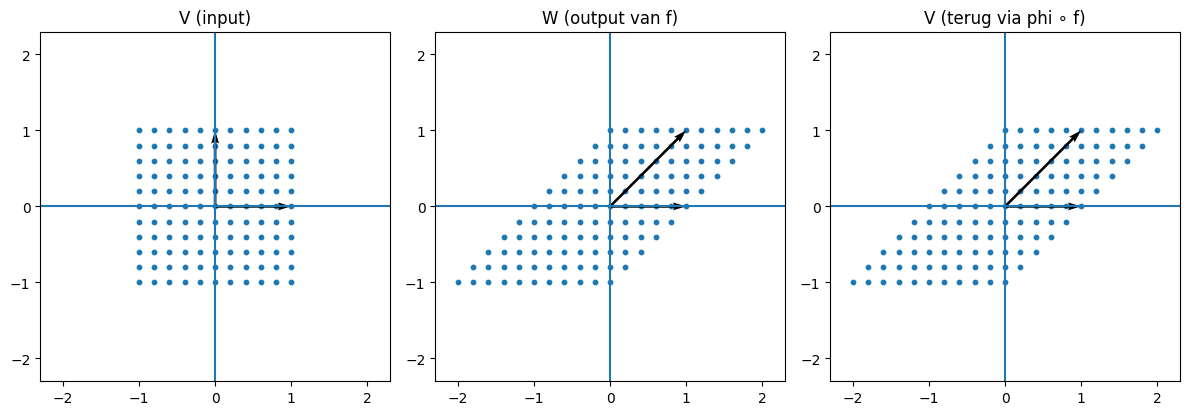

f : V -> W, matrix A =
 [[1. 1.]
 [0. 1.]]

phi : W -> V, rotatie R(theta), theta = 0.0

T = phi ∘ f : V -> V, matrix =
 [[1. 1.]
 [0. 1.]]

Eigenwaarden van T (hangt af van phi!) = [1. 1.]


In [4]:
def plot_VW_V(A, theta=0.0, grid_n=11):
    V = Space("V", 2)
    W = Space("W", 2)

    f = LinearMap(A, V, W, name="f")
    phi = LinearMap(R(theta), W, V, name="phi")  # identificatie W -> V

    T = phi @ f  # T: V -> V

    # grid punten in V
    xs = np.linspace(-1, 1, grid_n)
    ys = np.linspace(-1, 1, grid_n)
    X, Y = np.meshgrid(xs, ys)
    ptsV = np.vstack([X.ravel(), Y.ravel()])              # (2, N)
    ptsW = f.A @ ptsV                                     # (2, N)
    ptsV2 = T.A @ ptsV                                    # (2, N)

    # basisvectoren
    e1 = np.array([1.0, 0.0])
    e2 = np.array([0.0, 1.0])
    fe1, fe2 = f.A @ e1, f.A @ e2
    Te1, Te2 = T.A @ e1, T.A @ e2

    # limieten
    allpts = np.hstack([ptsV, ptsW, ptsV2,
                        np.column_stack([e1, e2, fe1, fe2, Te1, Te2])])
    lim = 1.15 * max(1.0, np.max(np.abs(allpts)))

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    titles = ["V (input)", "W (output van f)", "V (terug via phi ∘ f)"]

    for i in range(3):
        ax[i].axhline(0)
        ax[i].axvline(0)
        ax[i].set_aspect("equal", "box")
        ax[i].set_xlim(-lim, lim)
        ax[i].set_ylim(-lim, lim)
        ax[i].set_title(titles[i])

    ax[0].scatter(ptsV[0], ptsV[1], s=10)
    ax[1].scatter(ptsW[0], ptsW[1], s=10)
    ax[2].scatter(ptsV2[0], ptsV2[1], s=10)

    # pijlen: basisvectoren en beelden
    ax[0].quiver(0, 0, e1[0], e1[1], angles="xy", scale_units="xy", scale=1)
    ax[0].quiver(0, 0, e2[0], e2[1], angles="xy", scale_units="xy", scale=1)

    ax[1].quiver(0, 0, fe1[0], fe1[1], angles="xy", scale_units="xy", scale=1)
    ax[1].quiver(0, 0, fe2[0], fe2[1], angles="xy", scale_units="xy", scale=1)

    ax[2].quiver(0, 0, Te1[0], Te1[1], angles="xy", scale_units="xy", scale=1)
    ax[2].quiver(0, 0, Te2[0], Te2[1], angles="xy", scale_units="xy", scale=1)

    plt.tight_layout()
    plt.show()

    eigvals = np.linalg.eigvals(T.A)
    print("f : V -> W, matrix A =\n", f.A)
    print("\nphi : W -> V, rotatie R(theta), theta =", theta)
    print("\nT = phi ∘ f : V -> V, matrix =\n", T.A)
    print("\nEigenwaarden van T (hangt af van phi!) =", eigvals)

# voorbeeld call
A0 = np.array([[1.0, 1.0],
               [0.0, 1.0]])
plot_VW_V(A0, theta=0.0, grid_n=11)


In [5]:
try:
    from ipywidgets import interact, FloatSlider, IntSlider

    interact(
        lambda a11, a12, a21, a22, theta, grid_n:
            plot_VW_V(np.array([[a11, a12],[a21, a22]]), theta=theta, grid_n=grid_n),
        a11=FloatSlider(min=-2, max=2, step=0.1, value=1.0),
        a12=FloatSlider(min=-2, max=2, step=0.1, value=1.0),
        a21=FloatSlider(min=-2, max=2, step=0.1, value=0.0),
        a22=FloatSlider(min=-2, max=2, step=0.1, value=1.0),
        theta=FloatSlider(min=0, max=2*np.pi, step=0.05, value=0.0),
        grid_n=IntSlider(min=5, max=21, step=2, value=11),
    )
except Exception as e:
    print("ipywidgets niet beschikbaar in deze omgeving:", e)
    print("Je kan nog altijd plot_VW_V(...) manueel aanroepen.")


interactive(children=(FloatSlider(value=1.0, description='a11', max=2.0, min=-2.0), FloatSlider(value=1.0, des…

In [8]:
from matplotlib.animation import FuncAnimation
try:
    # PillowWriter is best for GIFs
    from matplotlib.animation import PillowWriter
except Exception:
    PillowWriter = None


def animate_theta(A, frames=120, grid_n=11, interval=50):
    """
    Maak een animatie waarbij phi = R(theta) roteert, en toon:
    - V (input)
    - W (output van f)
    - V (terug via phi ∘ f)

    Returnt het matplotlib.animation.FuncAnimation object.
    """
    A = np.array(A, dtype=float)

    # vaste grid en basis in V
    xs = np.linspace(-1, 1, grid_n)
    ys = np.linspace(-1, 1, grid_n)
    X, Y = np.meshgrid(xs, ys)
    ptsV = np.vstack([X.ravel(), Y.ravel()])
    e1 = np.array([1.0, 0.0])
    e2 = np.array([0.0, 1.0])

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    titles = ["V (input)", "W (output van f)", "V (terug via phi ∘ f)"]

    def update(frame):
        theta = 2*np.pi * frame/frames
        V = Space("V", 2)
        W = Space("W", 2)
        f = LinearMap(A, V, W, name="f")
        phi = LinearMap(R(theta), W, V, name="phi")
        T = phi @ f

        ptsW = f.A @ ptsV
        ptsV2 = T.A @ ptsV
        fe1, fe2 = f.A @ e1, f.A @ e2
        Te1, Te2 = T.A @ e1, T.A @ e2

        allpts = np.hstack([
            ptsV, ptsW, ptsV2,
            np.column_stack([e1, e2, fe1, fe2, Te1, Te2])
        ])
        lim = 1.15 * max(1.0, np.max(np.abs(allpts)))

        for i in range(3):
            ax[i].clear()
            ax[i].axhline(0)
            ax[i].axvline(0)
            ax[i].set_aspect("equal", "box")
            ax[i].set_xlim(-lim, lim)
            ax[i].set_ylim(-lim, lim)
            ax[i].set_title(titles[i])

        ax[0].scatter(ptsV[0], ptsV[1], s=10)
        ax[1].scatter(ptsW[0], ptsW[1], s=10)
        ax[2].scatter(ptsV2[0], ptsV2[1], s=10)

        ax[0].quiver(0, 0, e1[0], e1[1], angles="xy", scale_units="xy", scale=1)
        ax[0].quiver(0, 0, e2[0], e2[1], angles="xy", scale_units="xy", scale=1)

        ax[1].quiver(0, 0, fe1[0], fe1[1], angles="xy", scale_units="xy", scale=1)
        ax[1].quiver(0, 0, fe2[0], fe2[1], angles="xy", scale_units="xy", scale=1)

        ax[2].quiver(0, 0, Te1[0], Te1[1], angles="xy", scale_units="xy", scale=1)
        ax[2].quiver(0, 0, Te2[0], Te2[1], angles="xy", scale_units="xy", scale=1)

        return ax

    anim = FuncAnimation(fig, update, frames=frames, interval=interval, blit=False)
    # Sluit figuur om dubbele inline weergave te vermijden bij saven
    plt.close(fig)
    return anim


def save_animation(anim, filename="phi_f_animation.gif", fps=24, dpi=120):
    """Sla de animatie op als GIF (Pillow) of geef een hint voor mp4."""
    if PillowWriter is not None:
        try:
            writer = PillowWriter(fps=fps)
            anim.save(filename, writer=writer, dpi=dpi)
            print(f"Saved animation to: {filename}")
            return
        except Exception as e:
            print("Kon animatie niet saven als GIF via PillowWriter:", e)
    # fallback / hint voor mp4
    print("Tip: saven als mp4 met ffmpeg indien aanwezig:")
    print("anim.save('phi_f_animation.mp4', writer='ffmpeg', fps=fps, dpi=dpi)")

print("Animatie en save helpers geladen. Gebruik: anim = animate_theta(A); save_animation(anim, 'phi_f_animation.gif')")

Animatie en save helpers geladen. Gebruik: anim = animate_theta(A); save_animation(anim, 'phi_f_animation.gif')


In [9]:
# Voorbeeld: maak en bewaar een animatie als GIF
A0 = np.array([[1.0, 1.0],
               [0.0, 1.0]])

anim = animate_theta(A0, frames=120, grid_n=11, interval=50)
save_animation(anim, "phi_f_animation.gif", fps=24, dpi=120)


Saved animation to: phi_f_animation.gif
